- Inspirações:
    - https://www.kaggle.com/anokas/exploratory-data-analysis
    - https://www.kaggle.com/vykhand/exploring-products
    - https://www.kaggle.com/fabienvs/grupo-bimbo-data-analysis (completa com todas combinações de colunas possíveis)



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(rc={'figure.figsize':(15,5)})

plt.figure(figsize=(15,5))
plt.style.use('seaborn')

<Figure size 1080x360 with 0 Axes>

**Verificando max e min**

- Verificação servirá como base para conversão de tipos.

In [5]:
# for col in df.columns:
#     print('Coluna:{0} --- Min:{1} --- Max:{2} --- Count:{3} --- Type: {4}'
#           .format(col, df[col].min(), df[col].max(), len(df[col].unique()), type(df[col][0])))
# print('')
# print(df.info())

In [4]:
# Coluna:Semana --- Min:3 --- Max:3 --- Count:1 --- Type: <class 'numpy.uint8'>
# Coluna:Agencia_ID --- Min:1110 --- Max:25759 --- Count:551 --- Type: <class 'numpy.uint16'>
# Coluna:Canal_ID --- Min:1 --- Max:11 --- Count:9 --- Type: <class 'numpy.uint8'>
# Coluna:Ruta_SAK --- Min:1 --- Max:9975 --- Count:2816 --- Type: <class 'numpy.uint16'>
# Coluna:Cliente_ID --- Min:26 --- Max:2015152015 --- Count:752803 --- Type: <class 'numpy.uint32'>
# Coluna:Producto_ID --- Min:41 --- Max:49997 --- Count:1569 --- Type: <class 'numpy.uint16'>
# Coluna:Venta_uni_hoy --- Min:0 --- Max:5000 --- Count:1225 --- Type: <class 'numpy.uint32'>
# Coluna:Venta_hoy --- Min:0.0 --- Max:382694.40625 --- Count:37737 --- Type: <class 'numpy.float32'>
# Coluna:Dev_uni_proxima --- Min:0 --- Max:16345 --- Count:286 --- Type: <class 'numpy.uint16'>
# Coluna:Dev_proxima --- Min:0.0 --- Max:130760.0 --- Count:6818 --- Type: <class 'numpy.float32'>
# Coluna:Demanda_uni_equil --- Min:0 --- Max:5000 --- Count:1216 --- Type: <class 'numpy.uint16'>
# 
# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 11165207 entries, 0 to 11165206
# Data columns (total 11 columns):
# Semana               uint8
# Agencia_ID           uint16
# Canal_ID             uint8
# Ruta_SAK             uint16
# Cliente_ID           uint32
# Producto_ID          uint16
# Venta_uni_hoy        uint32
# Venta_hoy            float32
# Dev_uni_proxima      uint16
# Dev_proxima          float32
# Demanda_uni_equil    uint16
# dtypes: float32(2), uint16(5), uint32(2), uint8(2)
# memory usage: 298.1 MB
# None

In [3]:
dtype = {'Semana':'uint8',
         'Canal_ID':'uint8',
         'Agencia_ID':'uint16',
         'Ruta_SAK':'uint16',
         'Dev_uni_proxima':'uint16',
         'Cliente_ID':'uint32',
         'Producto_ID':'uint16',
         'Venta_uni_hoy':'uint32',
         'Demanda_uni_equil':'uint16',
         'Venta_hoy':'float32',
         'Dev_proxima':'float32'}

# Semana 3 inteira
df = pd.read_csv('train.csv', dtype=dtype, nrows=500000)

#df = pd.read_csv('train.csv', dtype=dtype, nrows=100000)

df.drop('Semana', axis=1, inplace=True)

In [4]:
df.skew()

Agencia_ID            -0.377631
Canal_ID               7.873220
Ruta_SAK               2.404105
Cliente_ID             1.646671
Producto_ID            0.793070
Venta_uni_hoy         26.227233
Venta_hoy             27.093251
Dev_uni_proxima      241.061320
Dev_proxima          123.772454
Demanda_uni_equil     26.656566
dtype: float64

**Distribuição dos pedidos**

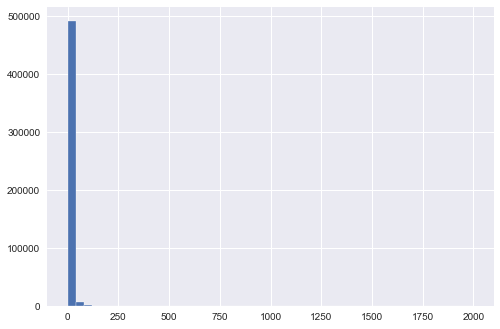

In [6]:
plt.hist(df.Demanda_uni_equil, bins=50)
plt.show()

Parece que há outliers na distribuição. Limitando o range:

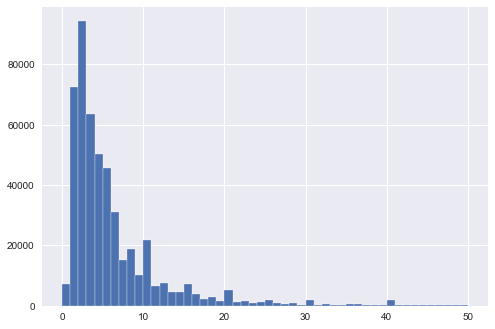

In [40]:
plt.hist(df.Demanda_uni_equil, bins=50, range=(0,50))
plt.show()

In [47]:
df[df.Demanda_uni_equil < 50].Demanda_uni_equil.count()/df.Demanda_uni_equil.count()

0.990666

Mais de 99% dos dados estão agrupados em até 50 pedidos.

In [63]:
df2 = pd.read_csv('train.csv', dtype=dtype).sample(1000000)
df2 = df2[df2.Demanda_uni_equil < 15]

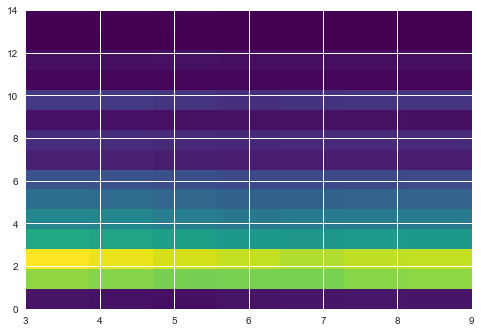

In [75]:
plt.hist2d(df2.Semana, df2.Demanda_uni_equil, bins=[7, 15], cmap='viridis')
plt.show()

Tirando a semana 3, a quantidade de pedidos parece ter ficado estagnada durante as semanas.